3. Создание нейронной сети при помощи пакета torch. Dataset и Dataloader.

1. Автоматическое дифференцирование в torch
1.1 Воспользовавшись классами Neuron и MSELoss из задачи 2.4.1 и автоматическим дифференцированием, которое предоставляет torch, решить задачу регрессии. Для оптимизации использовать стохастический градиетный спуск.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

torch.manual_seed(63)

In [2]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [3]:
X[:5], X.shape

(tensor([[ 1.9317, -0.5266, -0.4661, -0.2237],
         [ 1.0520, -1.4549, -0.3678,  2.1337],
         [-1.8028, -0.0236,  1.6344,  0.3281],
         [-0.0807,  3.3557, -0.6158, -1.5962],
         [-0.1986, -1.0611,  0.6494,  0.5913]]),
 torch.Size([100, 4]))

In [4]:
y[:5], y.shape

(tensor([  3.7259, 173.6101,  16.4113, -58.5479,  30.4711]), torch.Size([100]))

In [5]:
class Neuron:
    def __init__(self, n_inputs):
        # <создать атрибуты объекта weights и bias>
        self.weights = torch.randn(n_inputs, requires_grad=True)
        self.bias = torch.randn(1, requires_grad=True)

    def forward(self, inputs):
        return torch.matmul(inputs, self.weights.T) + self.bias

    def backward(self, dvalue):
        self.dweights = dvalue
        self.dinput = dvalue * self.weights
        self.dbias = dvalue

        return self.dweights, self.dbias

    def parameters(self):
        return self.weights, self.bias


class MSELoss:
    def forward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_squared = diff ** 2
        mean_diff = differences_squared.mean()

        return mean_diff

    def backward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_doubled = 2 * diff
        differences_div = differences_doubled / y_pred.size(0)
        return differences_div

In [6]:
neuron = Neuron(X.shape[1])
mse = MSELoss()
optimizer = torch.optim.SGD(neuron.parameters(), lr=0.1)

In [7]:
for epoch in range(16):
    y_pred = neuron.forward(X)
    loss = mse.forward(y_pred=y_pred, y_true=y)
    print('Loss: ', loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

neuron.weights, coef

Loss:  11651.7578125
Loss:  7140.017578125
Loss:  4384.392578125
Loss:  2699.206787109375
Loss:  1667.02734375
Loss:  1033.5908203125
Loss:  643.9268798828125
Loss:  403.5118103027344
Loss:  254.63868713378906
Loss:  162.03814697265625
Loss:  104.12489318847656
Loss:  67.66603088378906
Loss:  44.532569885253906
Loss:  29.717668533325195
Loss:  20.128015518188477
Loss:  13.84477424621582


C:\Users\Damir\AppData\Local\Temp\ipykernel_4448\869744184.py:8: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2985.)
  return torch.matmul(inputs, self.weights.T) + self.bias


(tensor([25.6593, 29.9945, 21.4883, 90.0074], requires_grad=True),
 array([25.62290343, 30.86617197, 19.78343959, 92.9554559 ]))

1.2 Воспользовавшись классами Linear и MSELoss из задачи 2.1.4 и 2.3.1, ReLU из 2.2.1 и автоматическим дифференцированием,
которое предоставляет torch, решить задачу регрессии. Для оптимизации использовать пакетный градиентный спуск.
Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные
значения.

In [8]:
class Linear:
    def __init__(self, n_features, n_neurons):
        self.weights = torch.randn(n_features, n_neurons, requires_grad=True)
        self.biases = torch.randn(n_neurons, requires_grad=True)

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return (inputs @ self.weights) + self.biases

    def parameters(self):
        return self.weights, self.biases


class MSELoss:
    def forward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_squared = diff ** 2
        mean_diff = differences_squared.mean()

        return mean_diff

    def backward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_doubled = 2 * diff
        differences_div = differences_doubled / y_pred.size(0)
        return differences_div


class ReLU:
    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.where(inputs > 0, inputs, 0)

In [9]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

In [10]:
X[:5], X.shape

(tensor([[0.0000],
         [0.0101],
         [0.0202],
         [0.0303],
         [0.0404]]),
 torch.Size([100, 1]))

In [11]:
y[:5], y.shape

(tensor([[0.0558],
         [0.1185],
         [0.1298],
         [0.2740],
         [0.2868]]),
 torch.Size([100, 1]))

In [12]:
layer_1 = Linear(X.shape[1], 100)
layer_2 = Linear(100, y.shape[1])

relu = ReLU()
mse = MSELoss()

optimizer = torch.optim.SGD((*layer_1.parameters(), *layer_2.parameters()), lr=0.001)

In [13]:
losses = torch.empty(1000)
for epoch in range(1000):
    y_pred = layer_2.forward(relu.forward(layer_1.forward(X)))

    loss = mse.forward(y_pred=y_pred, y_true=y)
    optimizer.zero_grad()
    loss.backward()
    losses[epoch] = loss.item()
    optimizer.step()

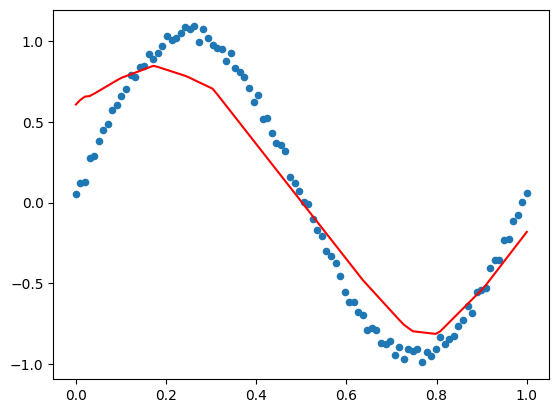

In [14]:
_, ax = plt.subplots(1)

ax.scatter(X, y, s=20)
res = layer_2.forward(relu.forward(layer_1.forward(X)))
ax.plot(X, res.detach(), c='r')
plt.show()

2. Алгоритмы оптимизации в torch.optim

In [15]:
import torch.optim as optim

2.1 Решить задачу 1.1, воспользовавшись оптимизатором optim.SDG для применения стохастического градиентого спуска

In [16]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [17]:
class Neuron:
    def __init__(self, n_inputs):
        self.weights = torch.randn(n_inputs, requires_grad=True)
        self.bias = torch.randn(1, requires_grad=True)

    def forward(self, inputs):
        return torch.matmul(inputs, self.weights.T) + self.bias

    def backward(self, bvalue):
        self.bweights = bvalue
        self.binput = bvalue * self.weights
        self.bbias = bvalue

        return self.bweights, self.bbias

    def parameters(self):
        return self.weights, self.bias


class MSELoss:
    def forward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_squared = diff ** 2
        mean_diff = differences_squared.mean()

        return mean_diff

    def backward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_doubled = 2 * diff
        differences_div = differences_doubled / y_pred.size(0)
        return differences_div

In [18]:
neuron = Neuron(X.shape[1])
mse = MSELoss()
optimizer = torch.optim.SGD(neuron.parameters(), lr=0.1)

In [19]:
for epoch in range(16):
    y_pred = neuron.forward(X)
    loss = mse.forward(y_pred=y_pred, y_true=y)
    print('Loss: ', loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

neuron.weights, coef

Loss:  14211.880859375
Loss:  9347.1240234375
Loss:  6177.01806640625
Loss:  4099.697265625
Loss:  2731.5234375
Loss:  1826.2442626953125
Loss:  1224.7530517578125
Loss:  823.6141967773438
Loss:  555.1998901367188
Loss:  375.0630187988281
Loss:  253.85211181640625
Loss:  172.10142517089844
Loss:  116.85076904296875
Loss:  79.44178009033203
Loss:  54.071998596191406
Loss:  36.84223175048828


(tensor([53.5552, 42.9587, 27.3130, 91.5231], requires_grad=True),
 array([54.65232546, 44.44459278, 27.99467135, 96.48020477]))

2.2 Решить задачу 1.2, воспользовавшись оптимизатором optim.Adam для применения пакетного градиентого спуска. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [20]:
class Linear:
    def __init__(self, n_features, n_neurons):
        self.weights = torch.randn(n_features, n_neurons, requires_grad=True)
        self.biases = torch.randn(n_neurons, requires_grad=True)

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return (inputs @ self.weights) + self.biases

    def parameters(self):
        return self.weights, self.biases


class MSELoss:
    def forward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_squared = diff ** 2
        mean_diff = differences_squared.mean()

        return mean_diff

    def backward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_doubled = 2 * diff
        differences_div = differences_doubled / y_pred.size(0)
        return differences_div


class ReLU:
    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.where(inputs > 0, inputs, 0)

In [21]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

In [22]:
layer_1 = Linear(X.shape[1], 100)
layer_2 = Linear(100, y.shape[1])

relu = ReLU()
mse = MSELoss()

optimizer = torch.optim.Adam((*layer_1.parameters(), *layer_2.parameters()), lr=0.001)

In [23]:
losses = torch.empty(1000)
for epoch in range(1000):
    y_pred = layer_2.forward(relu.forward(layer_1.forward(X)))

    loss = mse.forward(y_pred=y_pred, y_true=y)
    optimizer.zero_grad()
    loss.backward()
    losses[epoch] = loss.item()
    optimizer.step()

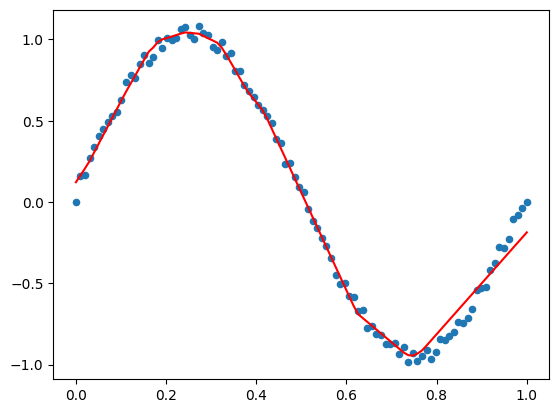

In [24]:
predicts = layer_2.forward(relu.forward(layer_1.forward(X)))
_, ax = plt.subplots(1)

ax.scatter(X, y, s=20)
ax.plot(X, predicts.detach(), c='r')
plt.show()

## 3. Построение сетей при помощи `torch.nn`

In [31]:
import torch.nn as nn

3.1 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде класса - наследника `nn.Module`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim`

In [32]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

In [33]:
class Net(nn.Module):
    def __init__(self, neurons):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(1, neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x


neuron = Net(15)
optimizer = optim.Adam(neuron.parameters(), lr=0.001)
mse = torch.nn.MSELoss()

Epoch 0 loss: 0.5386373996734619
Epoch 1000 loss: 0.1981545090675354
Epoch 2000 loss: 0.1970476508140564
Epoch 3000 loss: 0.19334763288497925
Epoch 4000 loss: 0.17506437003612518
Epoch 5000 loss: 0.09782955050468445
Epoch 6000 loss: 0.008307630196213722
Epoch 7000 loss: 0.0008987956680357456
Epoch 8000 loss: 0.000817486026789993


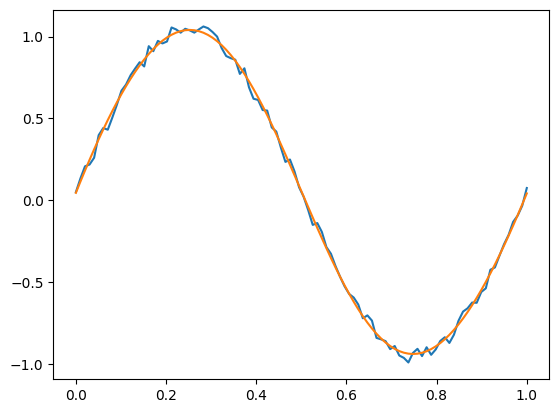

In [34]:
for epoch in range(9000):
    optimizer.zero_grad()
    y_pred = neuron.forward(X)
    loss = mse.forward(y_pred, y)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} loss: {loss}")

with torch.no_grad():
    plt.plot(X, y)
    plt.plot(X, neuron(X).detach().numpy())

3.2 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде объекта `nn.Sequential`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim`

In [156]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

In [157]:
model = nn.Sequential(
    nn.Linear(1, 5),
    nn.Tanh(),
    nn.Linear(5, 1),
    nn.Tanh(),
    nn.Linear(1, 5),
    nn.Tanh(),
    nn.Linear(5, 1)
)
optimizer = optim.Adam(model.parameters(), lr=0.01)
guas = torch.nn.GaussianNLLLoss()

losses = []
for epoch in range(5000):
    optimizer.zero_grad()

    y_pred = model.forward(X)
    var = torch.ones(y_pred.shape[0], y_pred.shape[1], requires_grad=True)
    loss = guas(y_pred, y, var)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()

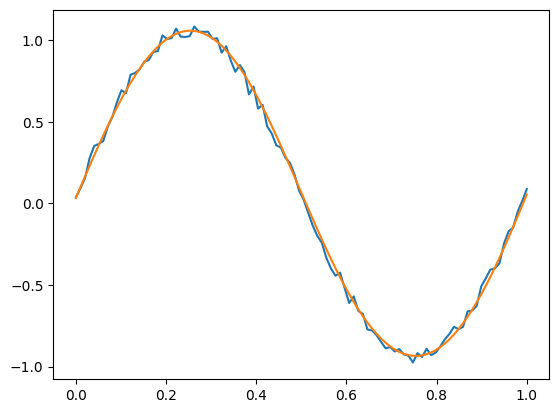

In [158]:
with torch.no_grad():
  plt.plot(X, y)
  plt.plot(X, model(X))

3.3 Решить задачу классификации. Датасет: Breast Cancer Wisconsin
1. Оформить нейронную сеть в виде объекта `nn.Sequential`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim`

In [351]:
from sklearn import datasets

dataset = datasets.load_breast_cancer()

X = torch.from_numpy(dataset.data).to(torch.float32)
y = torch.from_numpy(dataset.target).to(torch.float32).view(-1, 1)

In [352]:
X.shape

torch.Size([569, 30])

In [353]:
y.shape

torch.Size([569, 1])

In [355]:
model = nn.Sequential(
    nn.Linear(X.size(1), 50),
    nn.Tanh(),
    nn.Linear(50, y.size(1)),
    nn.Tanh(),
)
hloss = nn.HuberLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
m = nn.LogSoftmax()

for epoch in range(1000):
    optimizer.zero_grad()

    y_pred = model(X)
    loss = hloss(y_pred, y)
    loss.backward()

    optimizer.step()

    if epoch % 100 == 0:
        print(f"Loss: {loss.item()}")

Loss: 0.23355789482593536
Loss: 0.032053567469120026
Loss: 0.02944694273173809
Loss: 0.02630046010017395
Loss: 0.02408977597951889
Loss: 0.02168554998934269
Loss: 0.01937750168144703
Loss: 0.017181396484375
Loss: 0.015218732878565788
Loss: 0.013800757005810738


## 4. Datasets and dataloaders

In [239]:
from torch.utils.data import Dataset, DataLoader

4.1 Создать датасет, поставляющий данные из задачи 1.2.

Создать `DataLoader` на основе этого датасета и проверить работоспособность.

Воспользовавшись результатами 3.1 (или 3.2) обучите модель, пользуясь мини-пакетным градиентным спуском с размером пакета (`batch_size`) = 10

In [292]:
class SinDataset(Dataset):
    def __init__(self):
        self.X = torch.linspace(0, 1, 100).view(-1, 1)
        self.y = torch.sin(2 * np.pi * self.X) + 0.1 * torch.rand(self.X.size())

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

n_neurons = 10
model = nn.Sequential(
    nn.Linear(1, n_neurons),
    nn.Tanh(),
    nn.Linear(n_neurons, 1)
)

In [293]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
hloss = torch.nn.HuberLoss()
dataloader = DataLoader(SinDataset(), batch_size=10)

for epoch in range(10000):
    X_dl, y_dl = next(iter(dataloader))
    optimizer.zero_grad()
    y_pred = model.forward(X_dl)
    loss = hloss(y_pred, y_dl)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f"Loss: {loss.item()}")

Loss: 0.12169267237186432
Loss: 0.01839902624487877
Loss: 0.016013868153095245
Loss: 0.015022451058030128
Loss: 0.013892529532313347
Loss: 0.01242031715810299
Loss: 0.010413230396807194
Loss: 0.007910734973847866
Loss: 0.005243283696472645
Loss: 0.002876595826819539


4.2 Предсказание цен алмазов

4.2.1 Создайте датасет на основе файла diamonds.csv.

1. Удалите все нечисловые столбцы
2. Целевой столбец (`y`) - `price`
3. Преобразуйте данные в тензоры корректных размеров

4.2.2 Разбейте датасет на обучающий и тестовый датасет при помощи `torch.utils.data.random_split`.

4.2.3 Обучите модель для предсказания цен при помощи мини-пакетного градиентного спуска (`batch_size = 256`).

4.2.4 Выведите график функции потерь в зависимости от номера эпохи (значение потерь для эпохи рассчитывайте как среднее значение ошибок на каждом батче). Проверьте качество модели на тестовой выборке.


In [432]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

import warnings
warnings.filterwarnings("ignore")

In [433]:
class DiamondsDataset(Dataset):
    def __init__(self, data):
        super().__init__()
        self.data = pd.read_csv(data, index_col=[0])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        self.X = torch.FloatTensor(self.data.drop(columns=["price"]).select_dtypes(["number"]).values)
        self.y = torch.FloatTensor(self.data["price"].values)
        return self.X[idx], self.y[idx]

In [434]:
dataset = DiamondsDataset("diamonds.csv")
print(dataset[:10])

(tensor([[61.5000, 55.0000,  3.9500,  3.9800,  2.4300],
        [59.8000, 61.0000,  3.8900,  3.8400,  2.3100],
        [56.9000, 65.0000,  4.0500,  4.0700,  2.3100],
        [62.4000, 58.0000,  4.2000,  4.2300,  2.6300],
        [63.3000, 58.0000,  4.3400,  4.3500,  2.7500],
        [62.8000, 57.0000,  3.9400,  3.9600,  2.4800],
        [62.3000, 57.0000,  3.9500,  3.9800,  2.4700],
        [61.9000, 55.0000,  4.0700,  4.1100,  2.5300],
        [65.1000, 61.0000,  3.8700,  3.7800,  2.4900],
        [59.4000, 61.0000,  4.0000,  4.0500,  2.3900]]), tensor([326., 326., 327., 334., 335., 336., 336., 337., 337., 338.]))


In [435]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train, test = torch.utils.data.random_split(dataset, [train_size, test_size])

diamonds_dataloader_train = DataLoader(train, batch_size=256)
diamonds_dataloader_test = DataLoader(test, batch_size=256)

In [481]:
class Model(nn.Module):
    def __init__(self, n_neurons):
        super(Model, self).__init__()
        self.fc1 = torch.nn.Linear(n_neurons, 3)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(3, 1)
        # self.act2 = torch.nn.Tanh()
        # self.fc3 = torch.nn.Linear(5, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        # x = self.act2(x)
        # x = self.fc3(x)
        return x

neuron = Model(5)
optimizer = torch.optim.SGD(neuron.parameters(), lr=0.001, momentum=0.9)
huber = torch.nn.HuberLoss()

loss_list = []
for epoch in range(50):
    X_dl, y_dl = next(iter(diamonds_dataloader_train))
    optimizer.zero_grad()

    y_pred = neuron.forward(X_dl)
    loss = huber(y_pred, y_dl)
    loss_list.append(loss.item())
    loss.backward()
    optimizer.step()

    print(f"Loss: {loss}")

Loss: 4056.52783203125
Loss: 4056.522705078125
Loss: 4056.51171875
Loss: 4056.49609375
Loss: 4056.476318359375
Loss: 4056.45263671875
Loss: 4056.42578125
Loss: 4056.395751953125
Loss: 4056.36376953125
Loss: 4056.330078125
Loss: 4056.294921875
Loss: 4056.26123046875
Loss: 4056.224609375
Loss: 4056.18798828125
Loss: 4056.150390625
Loss: 4056.11181640625
Loss: 4056.072265625
Loss: 4056.03125
Loss: 4055.98876953125
Loss: 4055.947265625
Loss: 4055.904296875
Loss: 4055.861328125
Loss: 4055.81689453125
Loss: 4055.77392578125
Loss: 4055.73046875
Loss: 4055.687255859375
Loss: 4055.64453125
Loss: 4055.599609375
Loss: 4055.556640625
Loss: 4055.51220703125
Loss: 4055.46923828125
Loss: 4055.426025390625
Loss: 4055.3828125
Loss: 4055.33984375
Loss: 4055.294921875
Loss: 4055.25244140625
Loss: 4055.208984375
Loss: 4055.166259765625
Loss: 4055.123046875
Loss: 4055.08154296875
Loss: 4055.038330078125
Loss: 4054.99609375
Loss: 4054.952880859375
Loss: 4054.91015625
Loss: 4054.86767578125
Loss: 4054.824218

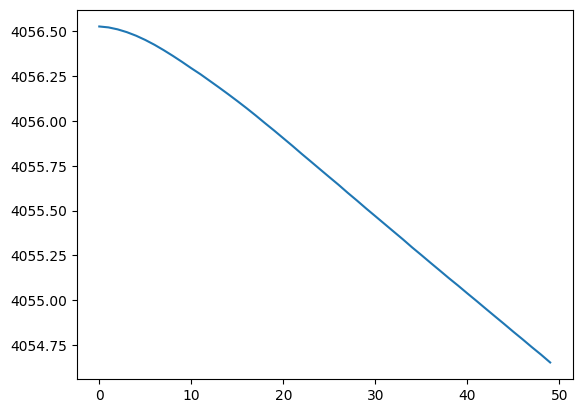

In [482]:
import matplotlib.pyplot as plt

with torch.no_grad():
  plt.plot(loss_list)

4.3 Модифицируйте метод `__init__` датасета из 4.2 таким образом, чтобы он мог принимать параметр `transform: callable`. Реализуйте класс `DropColsTransform` для удаления нечисловых данных из массива. Реализуйте класс `ToTensorTransorm` для трансформации массива в тензор.

In [484]:
class DiamondsDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = pd.read_csv(data, index_col = [0])
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        self.X = self.data.drop('price', axis=1)
        self.y = self.data['price']
        sample = self.X.iloc[idx], self.y.iloc[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample

In [485]:
class DropColsTransform:
    def __init__(self, drop):
        self.drop = drop

    def __call__(self, sample):
        self.X, self.y = sample
        self.X = self.X.drop(self.X.index[self.drop], axis=0)
        return self.X, self.y

In [486]:
class ToTensorTransform:
  def __call__(self, sample):
    X, y = sample
    X = torch.FloatTensor(X.astype('float64').values)
    y = torch.FloatTensor([y])
    return X, y

In [489]:
from torchvision import transforms

drop = DropColsTransform(drop=[1, 2, 3])
to_tensor = ToTensorTransform()
dataset = DiamondsDataset('diamonds.csv', transform=transforms.Compose([drop, to_tensor]))


AttributeError: partially initialized module 'torch.onnx.symbolic_helper' has no attribute 'quantized_args' (most likely due to a circular import)

In [ ]:
train, test = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), int(len(dataset)*0.2)])

diamonds_dataloader_train = DataLoader(train, batch_size=256)
diamonds_dataloader_test = DataLoader(test, batch_size=256)

In [ ]:
class DiamondsNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons, n_features):
        super(DiamondsNet, self).__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Linear(n_features, n_hidden_neurons),
            torch.nn.Sigmoid(),
            torch.nn.Linear(n_hidden_neurons,n_hidden_neurons),
            torch.nn.Sigmoid(),
            torch.nn.Linear(n_hidden_neurons,n_hidden_neurons*2),
            torch.nn.Sigmoid(),
            torch.nn.Linear(n_hidden_neurons*2,1)
        )

    def forward(self, x):
        x = self.net(x)
        return x

neuron = DiamondsNet(16, 6)
optimizer = torch.optim.SGD(neuron.parameters(), lr=0.01)
loss = torch.nn.MSELoss()

loss_vals = []
for epoch in range(20):
    X_new, y_new = next(iter(diamonds_dataloader_train))
    optimizer.zero_grad()

    y_pred = neuron.forward(X_new)
    loss_val = loss(y_pred, y_new)
    loss_vals.append(loss_val)

    loss_val.backward()

    optimizer.step()

    print(f"Epoch {epoch} loss: {loss_val}")

In [ ]:
with torch.no_grad():
  plt.plot(loss_vals)